In [6]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import io


In [7]:
# Import market news data

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/market_news_data.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
market_news = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [8]:
market_news.head()

,headline,source,url,date,score
0,This Coronavirus Insurance Bill Could Crash th...,ccn.com,https://www.ccn.com/this-coronavirus-insurance...,2020-04-06,-0.4019
1,China's Scary Coronavirus Warning Risks Epic S...,ccn.com,https://www.ccn.com/chinas-scary-coronavirus-w...,2020-04-28,-0.7717
2,Is Coca-Cola Stock the Real Deal?,smarteranalyst.com,http://www.smarteranalyst.com/analyst-insights...,2020-04-15,0.0000
3,Is AXP Stock a ‘Sell’ after Its Q1 Earnings?,marketrealist.com,https://marketrealist.com/2020/04/is-axp-stock...,2020-04-27,0.0000
4,Loeffler reports more stock sales denies wrong...,ajc.com,https://www.ajc.com/news/state--regional-govt-...,2020-04-06,-0.4703


In [9]:
# Aggregate the scores of news articles released on the same day

market_news = market_news.groupby('date').agg({'score' : 'mean'}).reset_index()


In [10]:
# Create sentiment categorical feature

# create a list of our conditions
conditions = [
    (market_news['score'] > 0),
    (market_news['score'] == 0),
    (market_news['score'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
market_news['level'] = np.select(conditions, values)

# display updated DataFrame
market_news.head()


,date,score,level
0,2019-04-02,-0.458800,negative
1,2019-04-03,-0.431067,negative
2,2019-04-04,0.014725,positive
3,2019-04-06,0.177900,positive
4,2019-04-08,0.102700,positive


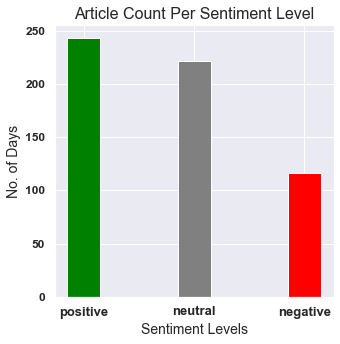

In [11]:
# Plot the count of each level

fig = plt.figure(figsize = (5, 5))

sns.set()
# creating the bar plot
plt.bar(values, market_news['level'].value_counts(), color =['green', 'grey', 'red'], width = 0.3)
 
plt.xlabel("Sentiment Levels", size = 14)
plt.ylabel("No. of Days", size = 14)
plt.title("Article Count Per Sentiment Level", size = 16)

plt.xticks(size = 13, weight = 'bold')
plt.yticks(size = 12, weight = 'bold')

plt.show()

In [12]:
market_news.head()

,date,score,level
0,2019-04-02,-0.458800,negative
1,2019-04-03,-0.431067,negative
2,2019-04-04,0.014725,positive
3,2019-04-06,0.177900,positive
4,2019-04-08,0.102700,positive


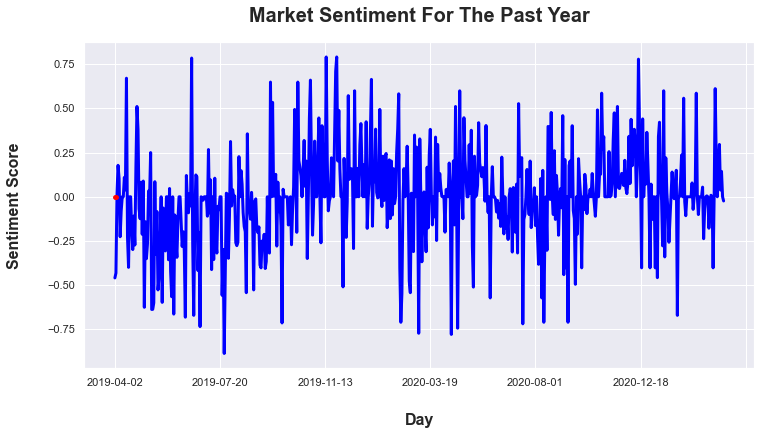

In [13]:

score_plot = market_news.plot(x = 'date', figsize = (12,6), color = 'Blue', linewidth=3,
                              grid = True, legend = False)

plt.title("Market Sentiment For The Past Year", pad = 20, fontweight='bold', size = 20)

locs, labels=plt.xticks()

plt.xlabel("Day", size = 16, weight = 'bold', labelpad = 25)
plt.ylabel("Sentiment Score", size = 16, weight = 'bold', labelpad = 25)

plt.plot(["2020-04-01", "2021-03-01"], [0, 0], color = "red", linewidth = 5)

plt.show()


In [14]:
market_news['year-month'] = market_news['date'].str.slice(0, 7)

# Aggregate the scores of news articles released on the same month

market_news_month = market_news.groupby('year-month').agg({'score' : 'mean'}).reset_index()


In [15]:
market_news_month.head()

,year-month,score
0,2019-04,-0.028224
1,2019-05,-0.222087
2,2019-06,-0.162008
3,2019-07,-0.140686
4,2019-08,-0.101743


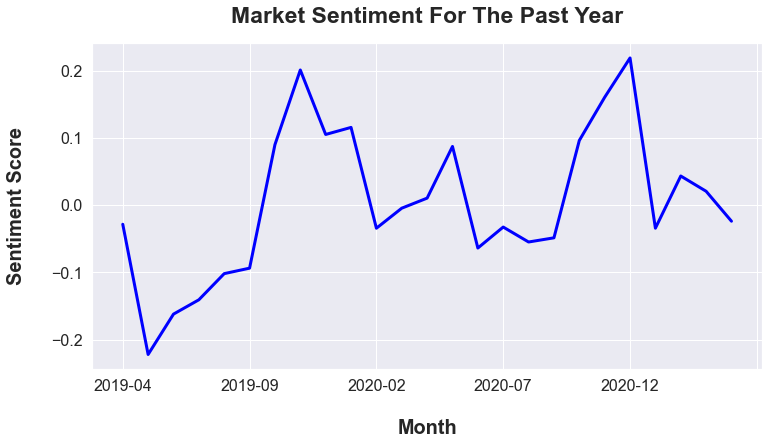

In [18]:
score_plot2 = market_news_month.plot(x = 'year-month', figsize = (12,6), color = ['Blue', 'Purple', 'darkorange'], linewidth=3,
                              grid = True, legend = False)

plt.title("Market Sentiment For The Past Year", pad = 20, fontweight='bold', size = 23)

locs, labels=plt.xticks()

plt.xlabel("Month", size = 20, weight = 'bold', labelpad = 25)
plt.ylabel("Sentiment Score", size = 20, weight = 'bold', labelpad = 25)

plt.xticks(size = 16)
plt.yticks(size = 16)

plt.show()

In [19]:
# Import Stock News Data

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/stock_news_data.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
stock_news = pd.read_csv(io.StringIO(download.decode('utf-8')))


In [20]:
stock_news.head()

,ticker,headline,source,url,date,score
0,AAPL,Dow Futures Soar as New York Begins Winning th...,ccn.com,https://www.ccn.com/dow-futures-soar-as-new-yo...,2020-04-06,-0.1280
1,AAPL,Apple Snaps Up AI Startup Inductiv As Analysts...,smarteranalyst.com,https://www.smarteranalyst.com/yahoo/apple-sna...,2020-05-28,0.4019
2,AAPL,Gates Foundation Buys Up Amazon Apple Twitter ...,smarteranalyst.com,https://www.smarteranalyst.com/yahoo/gates-fou...,2020-05-25,0.1779
3,AAPL,Apple China Sales On Recovery Path In April iP...,smarteranalyst.com,https://www.smarteranalyst.com/yahoo/apple-chi...,2020-05-25,0.0000
4,AAPL,Intel Taiwan Semiconductor Said to Be in Talks...,smarteranalyst.com,http://www.smarteranalyst.com/uncategorized/in...,2020-05-13,0.0000


In [21]:
# Aggregate the scores of news articles released on the same day

stock_news_agg = stock_news.groupby('date').agg({'score' : 'mean'}).reset_index()


In [22]:
# Create sentiment categorical feature

# create a list of our conditions
conditions = [
    (stock_news_agg['score'] > 0),
    (stock_news_agg['score'] == 0),
    (stock_news_agg['score'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
stock_news_agg['level'] = np.select(conditions, values)

# display updated DataFrame
stock_news_agg.head()


,date,score,level
0,2019-04-01,-0.110400,negative
1,2019-04-02,-0.140500,negative
2,2019-04-03,0.190633,positive
3,2019-04-04,-0.004880,negative
4,2019-04-05,0.636900,positive


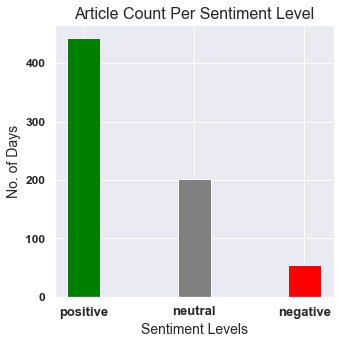

In [23]:
# Plot the count of each level

fig = plt.figure(figsize = (5, 5))

sns.set()
# creating the bar plot
plt.bar(values, stock_news_agg['level'].value_counts(), color =['green', 'grey', 'red'], width = 0.3)
 
plt.xlabel("Sentiment Levels", size = 14)
plt.ylabel("No. of Days", size = 14)
plt.title("Article Count Per Sentiment Level", size = 16)

plt.xticks(size = 13, weight = 'bold')
plt.yticks(size = 12, weight = 'bold')

plt.show()

In [24]:
tickers= ["AAPL", "FB", "ADBE", "INTC", "PYPL", "BABA", "QCOM", "SHOP", "AMD", "MSFT"]

news_data = pd.DataFrame()

for ticker in tickers:
    
    if news_data.empty == True:
        one = stock_news[stock_news['ticker'] == ticker]
        one = one.groupby('date').agg({'score' : 'mean'}).reset_index()
        one['ticker'] = ticker
        one.head()
        news_data = one
    else:
        one = stock_news[stock_news['ticker'] == ticker]
        one = one.groupby('date').agg({'score' : 'mean'}).reset_index()
        one['ticker'] = ticker
        news_data = news_data.append(one)
        
news_data.head()

,date,score,ticker
0,2019-04-03,0.0000,AAPL
1,2019-04-05,0.6369,AAPL
2,2019-04-16,0.0258,AAPL
3,2019-04-29,0.0000,AAPL
4,2019-05-01,-0.8689,AAPL


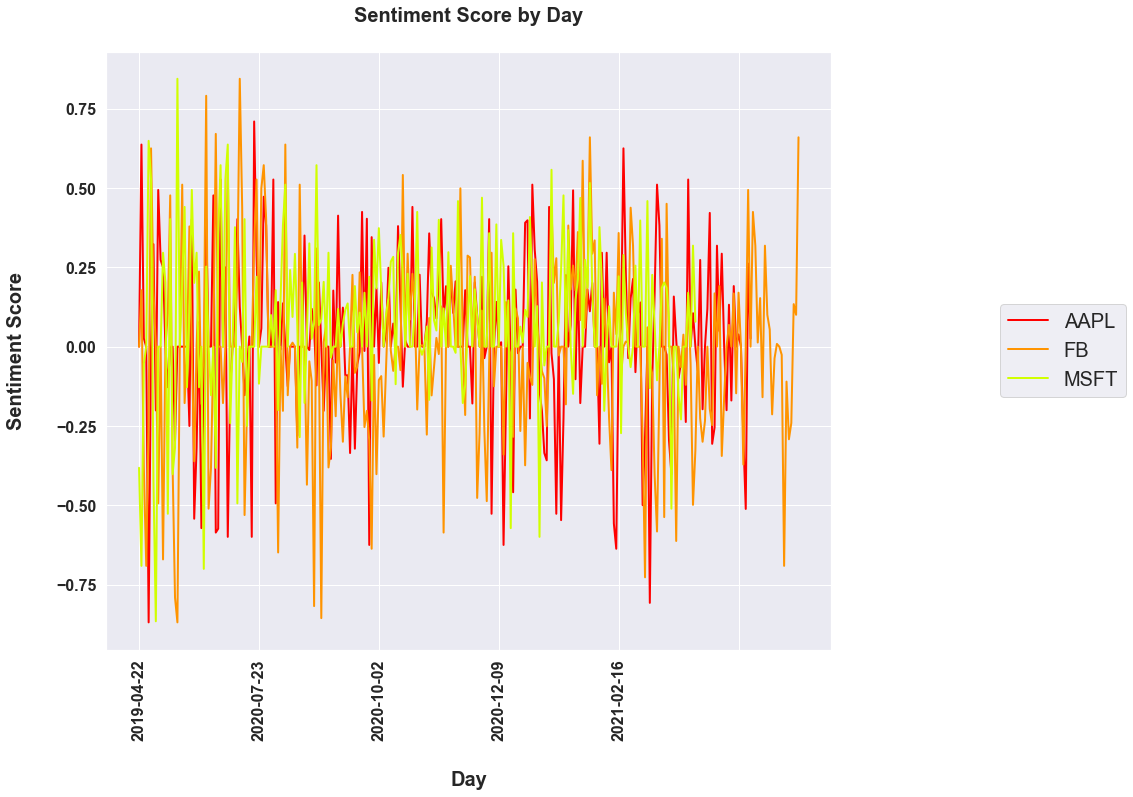

In [25]:
sub = news_data[news_data['ticker'].isin(["AAPL", "MSFT", "FB"])]

fig, ax = plt.subplots()

cm = plt.get_cmap('hsv')
ax.set_prop_cycle(color = [cm(1.*i/10) for i in range(3)])

for label, grp in sub.groupby('ticker'):
    grp.plot(x = 'date', y = 'score', ax = ax, label = label, figsize = (13,11), linewidth=2)
    ax.set_xlabel("Day", size = 20, fontweight='bold', labelpad = 30)
    ax.set_ylabel("Sentiment Score", size = 20, fontweight='bold', labelpad = 30)

plt.title("Sentiment Score by Day", fontweight='bold', size = 20, pad = 30)    
plt.legend(loc = 'right', bbox_to_anchor = (1.42, 0.5), prop = {'size': 20})
plt.xticks(rotation=90, size = 16, weight = 'bold')
plt.yticks(size = 16, weight = 'bold')
plt.show()


In [26]:
news_data['year-month'] = news_data['date'].str.slice(0, 7)

# Aggregate the scores of news articles released on the same month

tickers= ["AAPL", "FB", "ADBE", "INTC", "PYPL", "BABA", "QCOM", "SHOP", "AMD", "MSFT"]

news_data2 = pd.DataFrame()

for ticker in tickers:
    
    if news_data2.empty == True:
        one = news_data[news_data['ticker'] == ticker]
        one = one.groupby('year-month').agg({'score' : 'mean'}).reset_index()
        one['ticker'] = ticker
        one.head()
        news_data2 = one
    else:
        one = news_data[news_data['ticker'] == ticker]
        one = one.groupby('year-month').agg({'score' : 'mean'}).reset_index()
        one['ticker'] = ticker
        news_data2 = news_data2.append(one)
        
news_data2.head()

,year-month,score,ticker
0,2019-04,0.165675,AAPL
1,2019-05,-0.186725,AAPL
2,2019-06,0.493900,AAPL
3,2019-08,0.273200,AAPL
4,2019-09,0.030500,AAPL


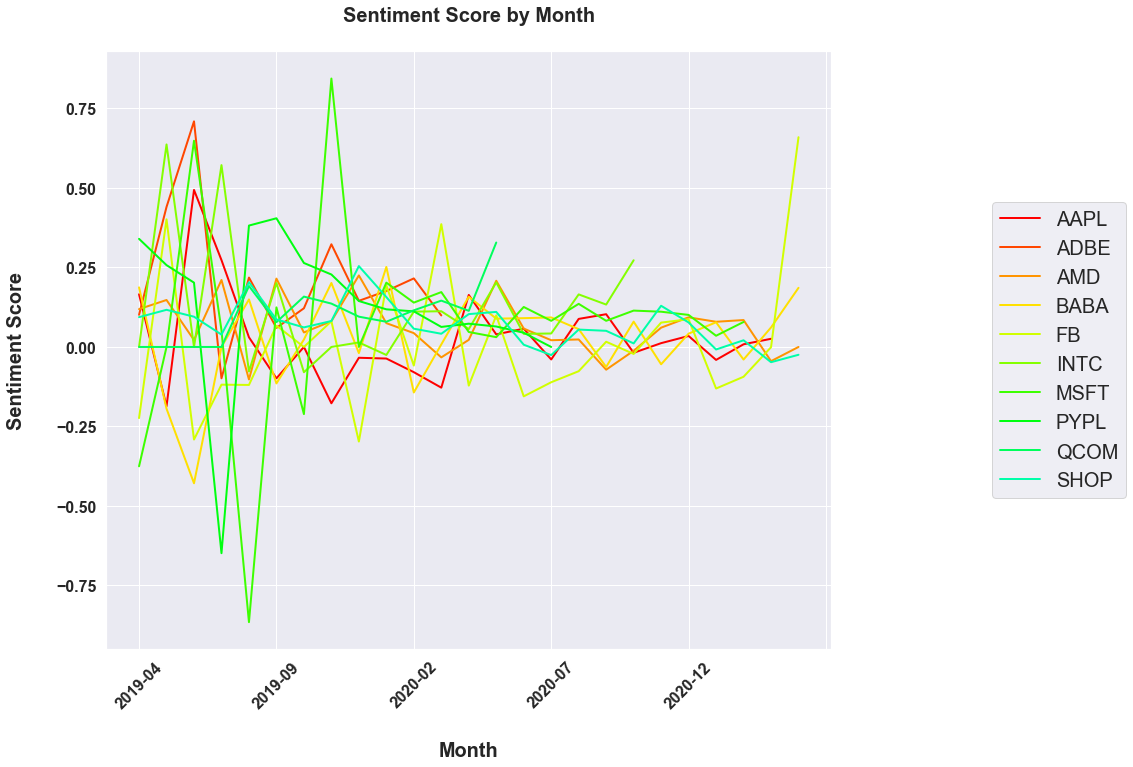

In [27]:
sub = news_data2[news_data2['ticker'].isin(["AAPL", "MSFT", "FB"])]

fig, ax = plt.subplots()

cm = plt.get_cmap('hsv')
ax.set_prop_cycle(color = [cm(1.*i/20) for i in range(10)])

for label, grp in news_data2.groupby('ticker'):
    grp.plot(x = 'year-month', y = 'score', ax = ax, label = label, figsize = (13,11), linewidth=2)
    ax.set_xlabel("Month", size = 20, fontweight='bold', labelpad = 30)
    ax.set_ylabel("Sentiment Score", size = 20, fontweight='bold', labelpad = 30)

plt.title("Sentiment Score by Month", fontweight = 'bold', size = 20, pad = 30)    
plt.legend(loc = 'right', bbox_to_anchor = (1.42, 0.5), prop = {'size': 20})
plt.xticks(rotation=45, size = 16, weight = 'bold')
plt.yticks(size = 16, weight = 'bold')
plt.show()


In [28]:
# Import stock price data

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/price.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
stock_price = pd.read_csv(io.StringIO(download.decode('utf-8')))


stock_price['date'] = pd.DatetimeIndex(stock_price['label'])

stock_price['date'] = stock_price['date'].dt.strftime('%Y-%m-%d')

stock_price = stock_price.loc[(stock_price['date'] >= '2020-04-01')
                     & (stock_price['date'] <= '2021-04-01')]

stock_price['year-month'] = stock_price['date'].str.slice(0, 7)

# Aggregate the scores of news articles released on the same month

stock_price_month = stock_price.groupby('year-month').agg({'changePercent' : 'mean'}).reset_index()

stock_price_month.head()

,year-month,changePercent
0,2020-04,-0.008109
1,2020-05,-0.005379
2,2020-06,-0.003836
3,2020-07,-0.004269
4,2020-08,-0.005239


In [29]:
# Import Stock News Data

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/stock_news_data.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
stock_news = pd.read_csv(io.StringIO(download.decode('utf-8')))

stock_news = stock_news.groupby('date').agg({'score' : 'mean'}).reset_index()

stock_news['year-month'] = stock_news['date'].str.slice(0, 7)

stock_news["date"] = pd.DatetimeIndex(stock_news["date"])

stock_news = stock_news.loc[(stock_news['date'] >= '2020-04-01')
                     & (stock_news['date'] <= '2021-04-01')]

stock_news['week'] = stock_news['date'].dt.isocalendar().week

# Aggregate the scores of news articles released on the same month

stock_news_month = stock_news.groupby('year-month').agg({'score' : 'mean'}).reset_index()

stock_news_week = stock_news.groupby('week').agg({'score' : 'mean'}).reset_index()

stock_news_month.head()

,year-month,score
0,2020-04,0.093445
1,2020-05,0.111049
2,2020-06,0.012586
3,2020-07,-0.023025
4,2020-08,0.072480


In [30]:
# Import market news data

# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/Yu821/stock_price_prediction/main/data/market_news_data.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
market_news = pd.read_csv(io.StringIO(download.decode('utf-8')))

market_news = market_news.groupby('date').agg({'score' : 'mean'}).reset_index()

market_news['year-month'] = market_news['date'].str.slice(0, 7)

market_news["date"] = pd.DatetimeIndex(market_news["date"])

market_news = market_news.loc[(market_news['date'] >= '2020-04-01')
                     & (market_news['date'] <= '2021-04-01')]

market_news['week'] = market_news['date'].dt.isocalendar().week

# Aggregate the scores of news articles released on the same month

market_news_month = market_news.groupby('year-month').agg({'score' : 'mean'}).reset_index()

market_news_week = market_news.groupby('week').agg({'score' : 'mean'}).reset_index()

market_news_month.head()

,year-month,score
0,2020-04,0.010661
1,2020-05,0.087572
2,2020-06,-0.063644
3,2020-07,-0.032407
4,2020-08,-0.054647


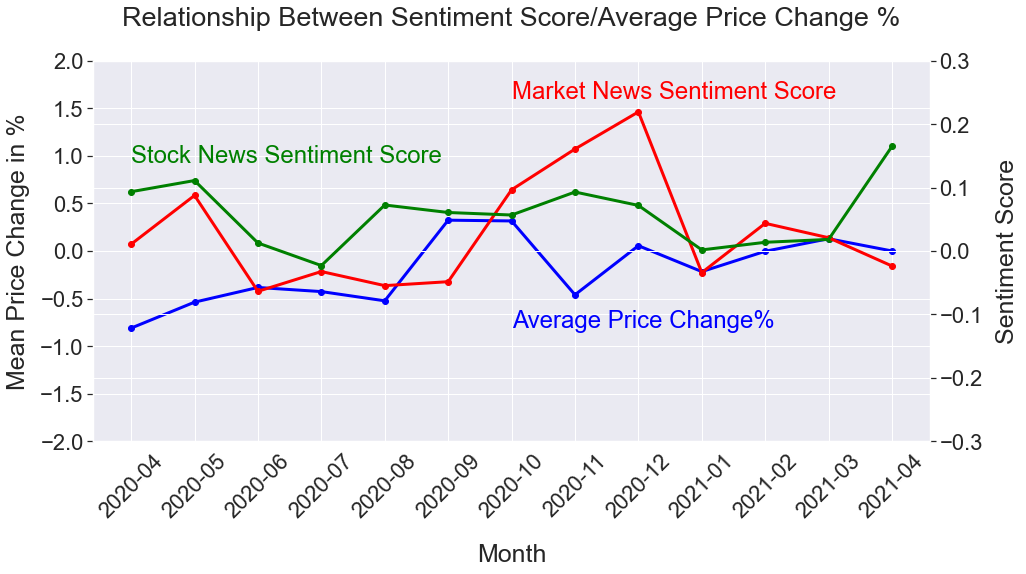

In [31]:
fig, ax1 = plt.subplots(figsize=(15,7))

ax2 = ax1.twinx()

ax1.plot(stock_price_month['year-month'], stock_price_month['changePercent']*100, color = "Blue",
         label = "Mean Change in Price", linewidth = 3)
ax1.scatter(stock_price_month['year-month'], stock_price_month['changePercent']*100, color="Blue",
            label = "Mean Change in Price")

ax2.plot(market_news_month['year-month'], market_news_month['score'], color="Red", label = "Market Sentiment Score",
         linewidth = 3)
ax2.plot(stock_news_month['year-month'], stock_news_month['score'], color="Green", label = "Stock Sentiment Score",
         linewidth = 3)

ax2.scatter(market_news_month['year-month'], market_news_month['score'], color="Red", label = "Market Sentiment Score")
ax2.scatter(stock_news_month['year-month'], stock_news_month['score'], color="Green", label = "Stock Sentiment Score" )

ax1.set_xlabel('Month', size = 25, labelpad = 22)
ax2.set_ylabel('Sentiment Score', size = 25, labelpad = 13)
ax1.set_ylabel('Mean Price Change in %', size = 25, labelpad = 10)

ax1.set_title("Relationship Between Sentiment Score/Average Price Change %", pad = 35, size = 27)

ax1.tick_params(labelsize=22)
ax2.tick_params(labelsize=22)
ax1.tick_params(labelrotation = 45, axis = 'x')

ax1.set_ylim([-2,2])
ax2.set_ylim([-0.3,0.3])

plt.text(x="2020-10", y=-0.12, s="Average Price Change%", fontsize=24, color = "Blue")
plt.text(x="2020-10", y=0.24, s="Market News Sentiment Score", fontsize=24, color = "Red")
plt.text(x="2020-04", y=0.14, s="Stock News Sentiment Score", fontsize=24, color = "Green")

plt.show()